In [12]:
!pip install processscheduler ipympl

In [13]:
%matplotlib widget
import processscheduler as ps

# Scheduling. Theory, Algorithms, and Systems

This section presents examples from [Michael Pinedo](https://wp.nyu.edu/michaelpinedo/)'s renowned book:

Pinedo, Michael. L. (2012) "Scheduling. Theory, Algorithms, and Systems". 4th edition. Springer New York, NY. ISBN  doi: [10.1007/978-1-4614-2361-4](https://doi.org/10.1007/978-1-4614-2361-4)

## Example 2.3.2 (A Scheduling Anomaly)

Consider an instance of P2 | prec | Cmax with 10 jobs and the following
processing times.


| jobs n° | pj |
|---------|----|
| 1 | 8 |
| 2 | 7 |
| 3 | 7 |
| 4 | 2 |
| 5 | 3 |
| 6 | 2 |
| 7 | 2 |
| 8 | 8 |
| 9 | 8 |
| 10 | 15 |

Solver type:
===========

-> Standard SAT/SMT solver

Incremental optimizer:
======================

Found value: 54 elapsed time:0.947s

Checking better value < 54

Found value: 53 elapsed time:2.137s

Checking better value < 53

Found value: 52 elapsed time:2.151s

Checking better value < 52

Found value: 51 elapsed time:2.178s

Checking better value < 51

Found value: 50 elapsed time:2.202s

Checking better value < 50

Found value: 49 elapsed time:2.232s

Checking better value < 49

Found value: 48 elapsed time:2.263s

Checking better value < 48

Found value: 47 elapsed time:2.290s

Checking better value < 47

Found value: 46 elapsed time:2.319s

Checking better value < 46

Found value: 45 elapsed time:2.341s

Checking better value < 45

Found value: 44 elapsed time:2.371s

Checking better value < 44

Found value: 43 elapsed time:2.394s

Checking better value < 43

Found value: 42 elapsed time:2.419s

Checking better value < 42

Found value: 41 elapsed time:2.515s

Checking better value < 41

Found value: 40 elapsed time:2.685s

Checking better value < 40

Found value: 39 elapsed time:2.971s

Checking better value < 39

Found value: 38 elapsed time:3.147s

Checking better value < 38

Found value: 37 elapsed time:3.168s

Checking better value < 37

Found value: 36 elapsed time:3.197s

Checking better value < 36

Found value: 35 elapsed time:3.292s

Checking better value < 35

Found value: 34 elapsed time:3.380s

Checking better value < 34

Found value: 33 elapsed time:3.398s

Checking better value < 33

Found value: 32 elapsed time:4.227s

Checking better value < 32

Found value: 31 elapsed time:4.468s

Checking better value < 31

Can't find a better solution for problem PinedoExample2.3.2.

Found optimum 31. Stopping iteration.

total number of iterations: 25

value: 31

PinedoExample2.3.2 satisfiability checked in 4.47s

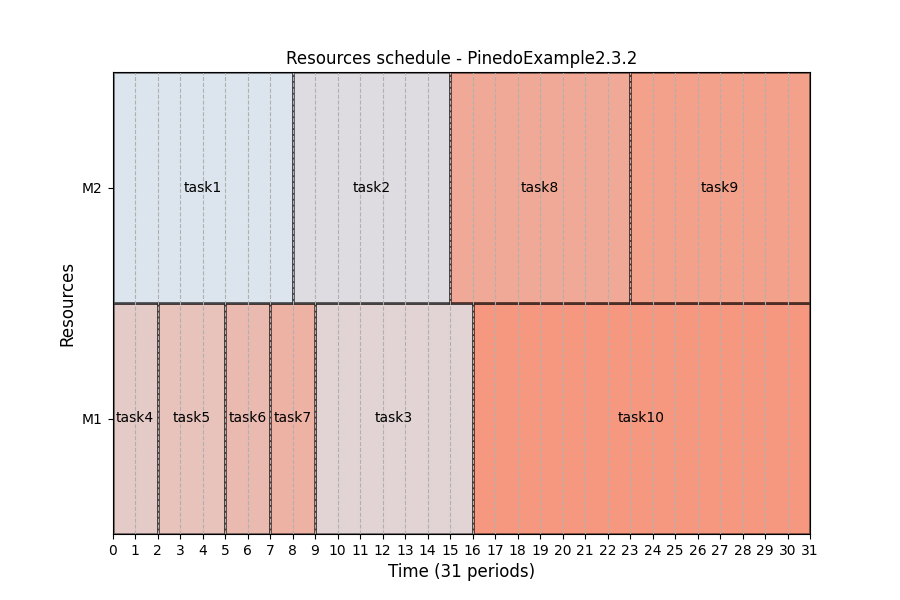

In [14]:
problem = ps.SchedulingProblem(name="PinedoExample2.3.2")

durations = [8, 7, 7, 2, 3, 2, 2, 8, 8, 15]
jobs = []

i = 1
for pj in durations:
    jobs.append(ps.FixedDurationTask(name=f"task{i}", duration=pj))
    i += 1

# two machines
machine_1 = ps.Worker(name="M1")
machine_2 = ps.Worker(name="M2")

# resource assignment: each job can be processed eithe by machine_1
# or machine_2
for j in jobs:
    j.add_required_resource(ps.SelectWorkers(list_of_workers=[machine_1, machine_2]))

# precedences
precs_graph = [
    (1, 2),
    (1, 3),
    (2, 10),
    (3, 10),
    (5, 3),
    (4, 5),
    (4, 6),
    (5, 8),
    (6, 7),
    (7, 9),
    (5, 9),
    (7, 8),
]

for i, j in precs_graph:
    ps.TaskPrecedence(task_before=jobs[i - 1], task_after=jobs[j - 1])

# non delay schedule
ps.ResourceNonDelay(resource=machine_1)
ps.ResourceNonDelay(resource=machine_2)

ps.ObjectiveMinimizeMakespan()
solver = ps.SchedulingSolver(problem=problem)
solution = solver.solve()
ps.render_gantt_matplotlib(solution)

The obtained schedule is shown below:

![Pinedo232PSGanttSol1](img/pinedo_example_232_solution_1.svg){ width="100%" }

This result is similar to the solution presented in the book, with a makespan of 31.

![Pinedo232PSGanttFromBook](img/gantta_pinedo_232.png){ width="100%" }

Now, let's reduce each of the ten processing times by one time unit:

Solver type:
===========

-> Standard SAT/SMT solver

Incremental optimizer:
======================

Found value: 45 elapsed time:0.879s

Checking better value < 45

Found value: 44 elapsed time:3.028s

Checking better value < 44

Found value: 43 elapsed time:3.048s

Checking better value < 43

Found value: 42 elapsed time:3.080s

Checking better value < 42

Found value: 41 elapsed time:3.109s

Checking better value < 41

Found value: 40 elapsed time:4.278s

Checking better value < 40

Found value: 39 elapsed time:4.304s

Checking better value < 39

Found value: 38 elapsed time:4.336s

Checking better value < 38

Found value: 37 elapsed time:4.368s

Checking better value < 37

Found value: 36 elapsed time:4.466s

Checking better value < 36

Found value: 35 elapsed time:4.481s

Checking better value < 35

Found value: 34 elapsed time:4.595s

Checking better value < 34

Found value: 33 elapsed time:4.758s

Checking better value < 33

Found value: 32 elapsed time:5.560s

Checking better value < 32

Found value: 31 elapsed time:5.972s

Checking better value < 31

Found value: 30 elapsed time:6.066s

Checking better value < 30

Found value: 29 elapsed time:6.131s

Checking better value < 29

Found value: 28 elapsed time:6.428s

Checking better value < 28

Found value: 27 elapsed time:6.536s

Checking better value < 27

Can't find a better solution for problem PinedoExample2.3.2ReducedProcessingTimes.

Found optimum 27. Stopping iteration.

total number of iterations: 20

value: 27

PinedoExample2.3.2ReducedProcessingTimes satisfiability checked in 6.54s

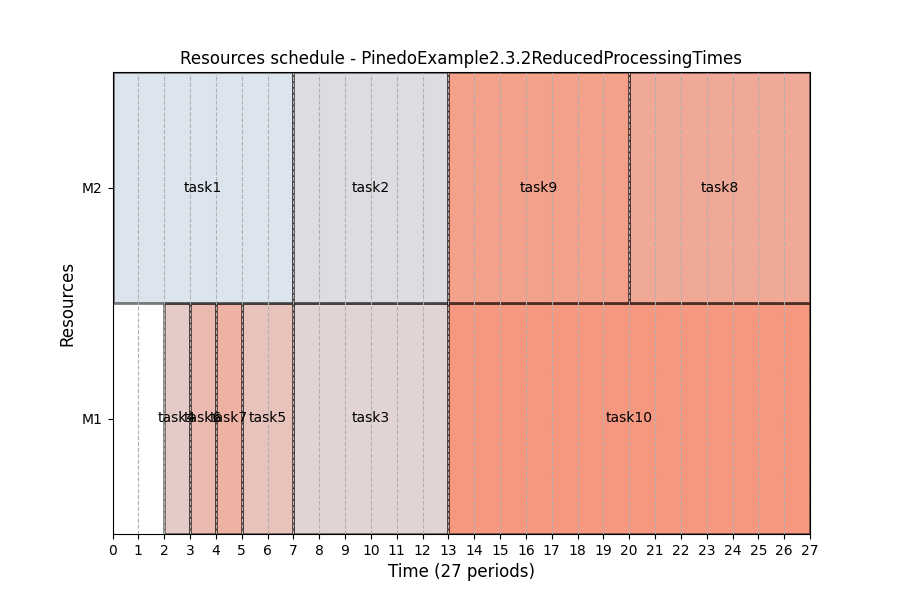

In [15]:
problem = ps.SchedulingProblem(name="PinedoExample2.3.2ReducedProcessingTimes")

durations = [7, 6, 6, 1, 2, 1, 1, 7, 7, 14]

jobs = []

i = 1
for pj in durations:
    jobs.append(ps.FixedDurationTask(name=f"task{i}", duration=pj))
    i += 1

# two machines
machine_1 = ps.Worker(name="M1")
machine_2 = ps.Worker(name="M2")

# resource assignment: each job can be processed eithe by machine_1
# or machine_2
for j in jobs:
    j.add_required_resource(ps.SelectWorkers(list_of_workers=[machine_1, machine_2]))

# precedences
precs_graph = [
    (1, 2),
    (1, 3),
    (2, 10),
    (3, 10),
    (5, 3),
    (4, 5),
    (4, 6),
    (5, 8),
    (6, 7),
    (7, 9),
    (5, 9),
    (7, 8),
]

for i, j in precs_graph:
    ps.TaskPrecedence(task_before=jobs[i - 1], task_after=jobs[j - 1])

# non delay schedule
ps.ResourceNonDelay(resource=machine_1)
ps.ResourceNonDelay(resource=machine_2)

ps.ObjectiveMinimizeMakespan()
solver = ps.SchedulingSolver(problem=problem)
solution = solver.solve()
ps.render_gantt_matplotlib(solution)

We solve the problem in the same way and obtain the following schedule:
![Pinedo232PSGanttSol2](img/pinedo_example_232_solution_2.svg){ width="100%" }

Here the conclusion is sligthly different from the one from Pinedo's book, where "one would expect that, if each one of the ten processing times is reduced by one time unit, the makespan would be less than 31. However, requiring the schedule to be non-delay results in the schedule depicted in [..] with a makespan of 32". Our solution, however, has a makespan of 27.

With 3 machines and the original settings, we get the following schedule:

![Pinedo232PSGanttSol3](img/pinedo_example_232_solution_3.svg){ width="100%" }

This also conflicts with Pinedo's conclusion, as he claims the makespan is now 36, whereas our solution results in a makespan of only 30.

## Example 3.2.5 (Minimizing Maximum Lateness)

Consider the following 4 jobs.

| jobs | $p_j$ | $r_j$ | $d_j$ |
| ---- | -- | -- | -- |
| 1    | 4  | 0  | 8 |
| 2    | 2  | 1  | 12 |
| 3    | 6  | 3  | 11 |
| 4    | 5  | 5  | 10 |

Solver type:
===========

-> Standard SAT/SMT solver

Incremental optimizer:
======================

Found value: 10 elapsed time:0.051s

Checking better value < 10

Found value: 9 elapsed time:0.053s

Checking better value < 9

Found value: 8 elapsed time:0.055s

Checking better value < 8

Found value: 7 elapsed time:0.056s

Checking better value < 7

Found value: 6 elapsed time:0.057s

Checking better value < 6

Found value: 5 elapsed time:0.059s

Checking better value < 5

Can't find a better solution for problem PinedoExample3.2.5.

Found optimum 5. Stopping iteration.

total number of iterations: 7

value: 5

PinedoExample3.2.5 satisfiability checked in 0.06s

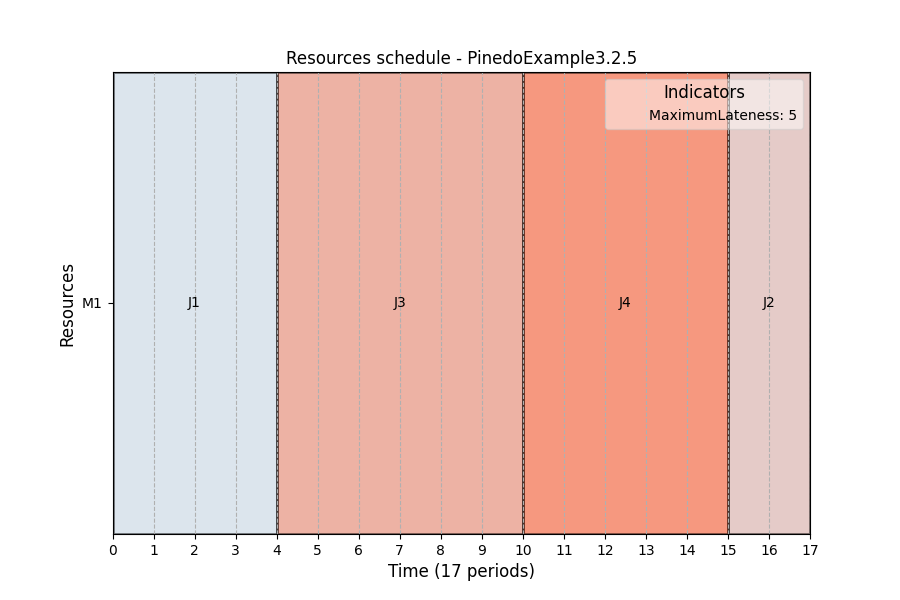

In [16]:
problem = ps.SchedulingProblem(name="PinedoExample3.2.5")

J1 = ps.FixedDurationTask(
    name="J1", duration=4, release_date=0, due_date=8, due_date_is_deadline=False
)
J2 = ps.FixedDurationTask(
    name="J2", duration=2, release_date=1, due_date=12, due_date_is_deadline=False
)
J3 = ps.FixedDurationTask(
    name="J3", duration=6, release_date=3, due_date=11, due_date_is_deadline=False
)
J4 = ps.FixedDurationTask(
    name="J4", duration=5, release_date=5, due_date=10, due_date_is_deadline=False
)

M1 = ps.Worker(name="M1")
J1.add_required_resource(M1)
J2.add_required_resource(M1)
J3.add_required_resource(M1)
J4.add_required_resource(M1)

lateness_indicator = ps.IndicatorMaximumLateness()
ps.ObjectiveMinimizeIndicator(target=lateness_indicator, weight=1)

solver = ps.SchedulingSolver(problem=problem)
solution = solver.solve()
ps.render_gantt_matplotlib(solution)

After solving, this gives the following Gantt chart, confirming "that schedule 1, 3, 4, 2 has to be optimal".

![Pinedo325PSGanttSol](img/pinedo_3_2_5_gantt_solution.svg){ width="100%" }

## Example 3.3.3 (Minimizing Number of Tardy Jobs)

Consider the following 5 jobs.

| jobs | $p_j$ | $d_j$ |
| ---- | -- | -- |
| 1    | 7  | 9  |
| 2    | 8  | 17 |
| 3    | 4  | 18 |
| 4    | 6  | 19 |
| 5    | 6  | 21 |

The implementation in Python is as follows:

Solver type:
===========

-> Standard SAT/SMT solver

Incremental optimizer:
======================

Found value: 4 elapsed time:0.047s

Checking better value < 4

Found value: 2 elapsed time:0.054s

Checking better value < 2

Can't find a better solution for problem PinedoExample3.3.3.

Found optimum 2. Stopping iteration.

total number of iterations: 3

value: 2

PinedoExample3.3.3 satisfiability checked in 0.05s

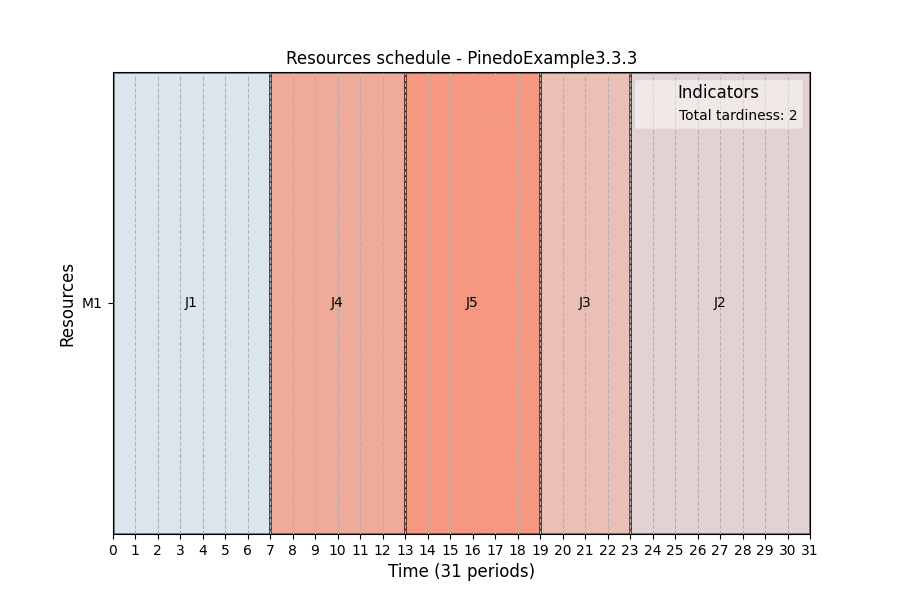

In [17]:
problem = ps.SchedulingProblem(name="PinedoExample3.3.3")

J1 = ps.FixedDurationTask(name="J1", duration=7, due_date=9, due_date_is_deadline=False)
J2 = ps.FixedDurationTask(
    name="J2", duration=8, due_date=17, due_date_is_deadline=False
)
J3 = ps.FixedDurationTask(
    name="J3", duration=4, due_date=18, due_date_is_deadline=False
)
J4 = ps.FixedDurationTask(
    name="J4", duration=6, due_date=19, due_date_is_deadline=False
)
J5 = ps.FixedDurationTask(
    name="J5", duration=6, due_date=21, due_date_is_deadline=False
)

M1 = ps.Worker(name="M1")

for j in [J1, J2, J3, J4, J5]:
    j.add_required_resource(M1)

ind = ps.IndicatorNumberOfTardyTasks()
ps.ObjectiveMinimizeIndicator(target=ind, weight=1)

solver = ps.SchedulingSolver(problem=problem)
solution = solver.solve()
ps.render_gantt_matplotlib(solution)

The resulting schedule

![Pinedo333PSGanttSol](img/pinedo_example_3_3_3_gantt_solution.svg){ width="100%" }


confirms that "The optimal schedule is 3, 4, 5, 1, 2 with $\sum{U_j = 2}$" and "Note also that there may be many optimal schedules".

## Example 3.4.5 (Minimizing Total Tardiness)

Consider the following 5 jobs.

| jobs | $p_j$ | $d_j$ |
| ---- | -- | -- |
| 1    |121  | 260  |
| 2    | 79  | 266 |
| 3    | 147  | 266 |
| 4    | 83  | 336 |
| 5    | 130  | 337 |

According to Pinedo, the optimal is "370. Two optimal sequences are 1, 2, 4, 5, 3 and 2, 1, 4, 5, 3", confirmed by the following simulation:

Solver type:
===========

-> Standard SAT/SMT solver

Incremental optimizer:
======================

Found value: 410 elapsed time:0.036s

Checking better value < 410

Found value: 385 elapsed time:0.043s

Checking better value < 385

Found value: 384 elapsed time:0.048s

Checking better value < 384

Found value: 383 elapsed time:0.050s

Checking better value < 383

Found value: 381 elapsed time:0.053s

Checking better value < 381

Found value: 379 elapsed time:0.055s

Checking better value < 379

Found value: 377 elapsed time:0.057s

Checking better value < 377

Found value: 375 elapsed time:0.062s

Checking better value < 375

Found value: 374 elapsed time:0.065s

Checking better value < 374

Found value: 373 elapsed time:0.067s

Checking better value < 373

Found value: 372 elapsed time:0.070s

Checking better value < 372

Found value: 371 elapsed time:0.071s

Checking better value < 371

Found value: 370 elapsed time:0.149s

Checking better value < 370

Can't find a better solution for problem PinedoExample3.4.5.

Found optimum 370. Stopping iteration.

total number of iterations: 14

value: 370

PinedoExample3.4.5 satisfiability checked in 0.15s

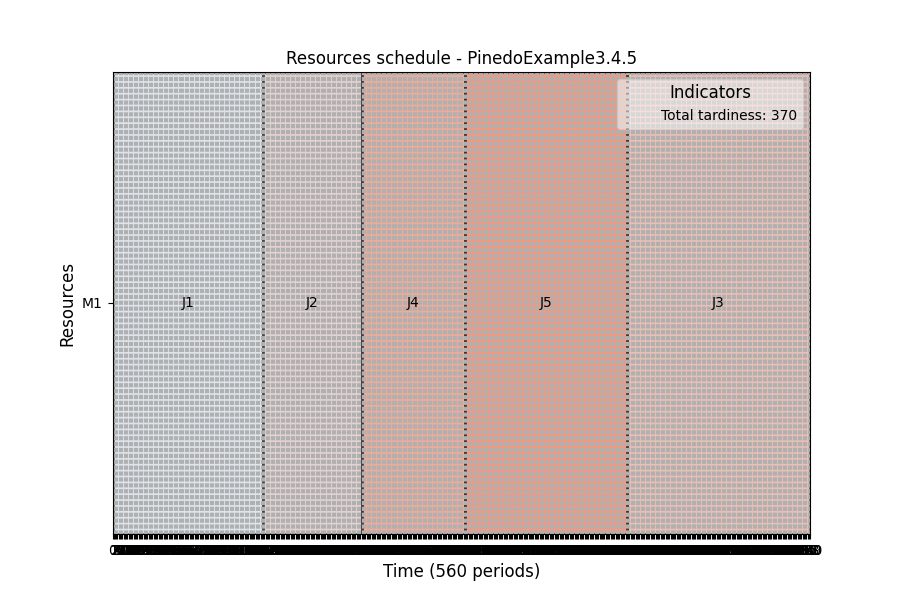

In [18]:
problem = ps.SchedulingProblem(name="PinedoExample3.4.5")

J1 = ps.FixedDurationTask(
    name="J1", duration=121, due_date=260, due_date_is_deadline=False
)
J2 = ps.FixedDurationTask(
    name="J2", duration=79, due_date=266, due_date_is_deadline=False
)
J3 = ps.FixedDurationTask(
    name="J3", duration=147, due_date=266, due_date_is_deadline=False
)
J4 = ps.FixedDurationTask(
    name="J4", duration=83, due_date=336, due_date_is_deadline=False
)
J5 = ps.FixedDurationTask(
    name="J5", duration=130, due_date=337, due_date_is_deadline=False
)

M1 = ps.Worker(name="M1")

for j in [J1, J2, J3, J4, J5]:
    j.add_required_resource(M1)

ind = ps.IndicatorTardiness()
ps.ObjectiveMinimizeIndicator(target=ind, weight=1)

solver = ps.SchedulingSolver(problem=problem, debug=False)
solution = solver.solve()
ps.render_gantt_matplotlib(solution)

![Pinedo345PSGanttSol](img/pinedo_example_3_4_5_gantt_solution.svg){ width="100%" }

## Example 3.6.3 (Minimizing Total Weighted Tardiness)

Consider the following 4 jobs.

| jobs | $w_j$ | $p_j$ | $d_j$ |
| ---- | -- | -- |---
| 1    |4 | 12  | 16  |
| 2    | 5  | 8 | 26 |
| 3    | 3  | 15 | 25 |
| 4    | 5  | 9 | 27 |

Pinedo states that "It turns out that the best schedule reachable from this node is 1, 2, 4, 3 with an objective value of 64."

However, our simulation gives a different result (the total weighted tardiness is 67):

Solver type:
===========

-> Standard SAT/SMT solver

Incremental optimizer:
======================

Found value: 133 elapsed time:0.040s

Checking better value < 133

Found value: 132 elapsed time:0.053s

Checking better value < 132

Found value: 119 elapsed time:0.055s

Checking better value < 119

Found value: 114 elapsed time:0.058s

Checking better value < 114

Found value: 111 elapsed time:0.060s

Checking better value < 111

Found value: 107 elapsed time:0.064s

Checking better value < 107

Found value: 102 elapsed time:0.069s

Checking better value < 102

Found value: 101 elapsed time:0.070s

Checking better value < 101

Found value: 98 elapsed time:0.073s

Checking better value < 98

Found value: 95 elapsed time:0.076s

Checking better value < 95

Found value: 92 elapsed time:0.079s

Checking better value < 92

Found value: 89 elapsed time:0.082s

Checking better value < 89

Found value: 86 elapsed time:0.084s

Checking better value < 86

Found value: 83 elapsed time:0.087s

Checking better value < 83

Found value: 78 elapsed time:0.095s

Checking better value < 78

Found value: 75 elapsed time:0.097s

Checking better value < 75

Found value: 70 elapsed time:0.102s

Checking better value < 70

Found value: 67 elapsed time:0.105s

Checking better value < 67

Can't find a better solution for problem PinedoExample3.6.3.

Found optimum 67. Stopping iteration.

total number of iterations: 19

value: 67

PinedoExample3.6.3 satisfiability checked in 0.10s

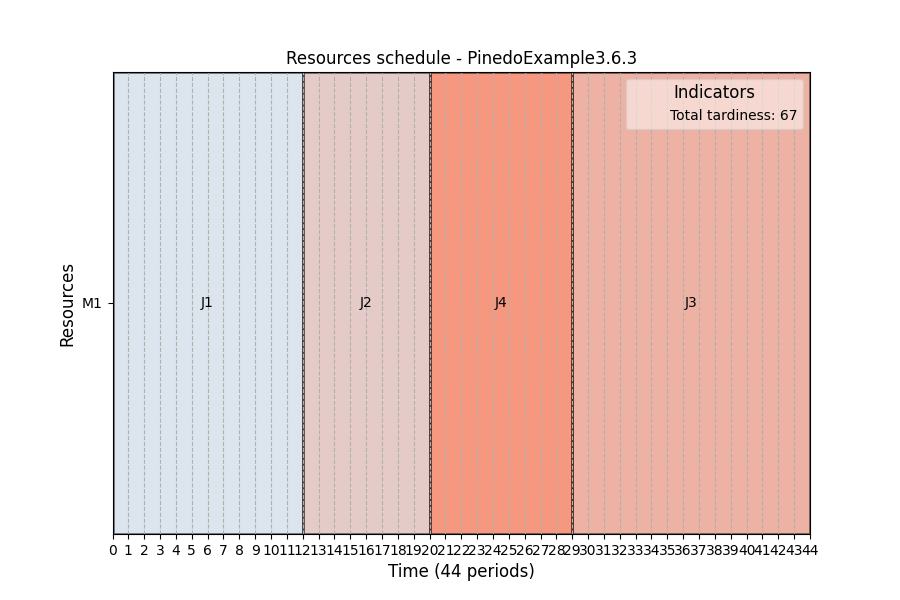

In [19]:
problem = ps.SchedulingProblem(name="PinedoExample3.6.3")
J1 = ps.FixedDurationTask(
    name="J1", priority=4, duration=12, due_date=16, due_date_is_deadline=False
)
J2 = ps.FixedDurationTask(
    name="J2", priority=5, duration=8, due_date=26, due_date_is_deadline=False
)
J3 = ps.FixedDurationTask(
    name="J3", priority=3, duration=15, due_date=25, due_date_is_deadline=False
)
J4 = ps.FixedDurationTask(
    name="J4", priority=5, duration=9, due_date=27, due_date_is_deadline=False
)

M1 = ps.Worker(name="M1")

for j in [J1, J2, J3, J4]:
    j.add_required_resource(M1)

ind = ps.IndicatorTardiness()
ps.ObjectiveMinimizeIndicator(target=ind, weight=1)

solver = ps.SchedulingSolver(problem=problem)
solution = solver.solve()
ps.render_gantt_matplotlib(solution)

## Example 4.1.5 (Minimizing Total Earliness and Tardiness with Tight Due Date)

Consider the following example with 6 jobs and due date $d = 180$.

| jobs | $p_j$ |
| ---- | -- |
| 1    |106 |
| 2    | 100 |
| 3    |96  | 
| 4    | 22  | 
| 5    | 20  |
| 6    | 2  |

The following script optimized minimizing both total earliness and tardiness:

Solver type:
===========

-> Standard SAT/SMT solver

Objectives:
        ======

MinimizeTotal tardiness

MinimizeTotal earliness

MinimizeEquivalentObjective

Incremental optimizer:
======================

Found value: 528 elapsed time:0.046s

Checking better value < 528

Found value: 448 elapsed time:0.054s

Checking better value < 448

Found value: 376 elapsed time:0.059s

Checking better value < 376

Found value: 366 elapsed time:0.068s

Checking better value < 366

Found value: 360 elapsed time:0.209s

Checking better value < 360

Can't find a better solution for problem PinedoExample4.1.5.

Found optimum 360. Stopping iteration.

total number of iterations: 6

value: 360

PinedoExample4.1.5 satisfiability checked in 0.21s

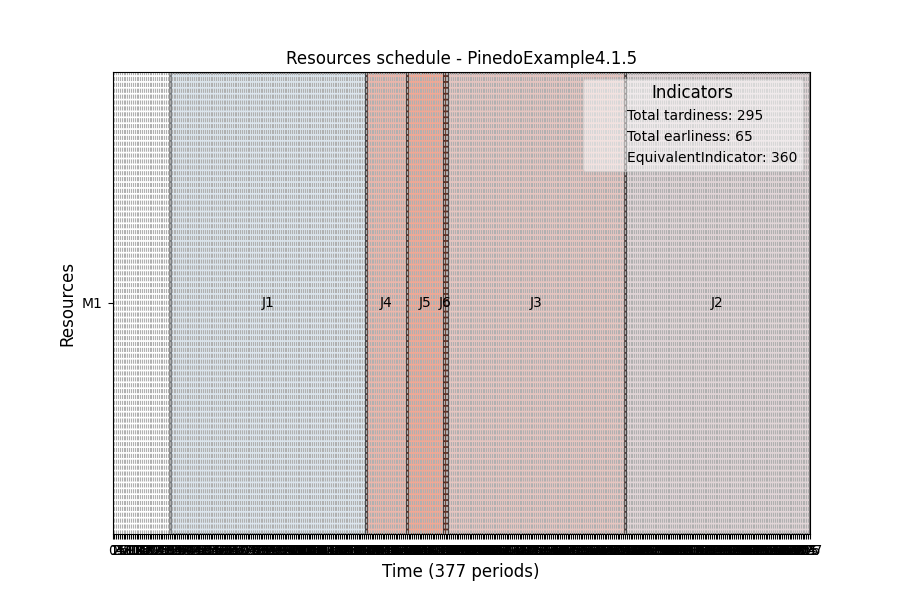

In [20]:
problem = ps.SchedulingProblem(name="PinedoExample4.1.5")

J1 = ps.FixedDurationTask(
    name="J1", duration=106, due_date=180, due_date_is_deadline=False
)
J2 = ps.FixedDurationTask(
    name="J2", duration=100, due_date=180, due_date_is_deadline=False
)
J3 = ps.FixedDurationTask(
    name="J3", duration=96, due_date=180, due_date_is_deadline=False
)
J4 = ps.FixedDurationTask(
    name="J4", duration=22, due_date=180, due_date_is_deadline=False
)
J5 = ps.FixedDurationTask(
    name="J5", duration=20, due_date=180, due_date_is_deadline=False
)
J6 = ps.FixedDurationTask(
    name="J6", duration=2, due_date=180, due_date_is_deadline=False
)

M1 = ps.Worker(name="M1")

for j in [J1, J2, J3, J4, J5, J6]:
    j.add_required_resource(M1)

total_tardiness = ps.IndicatorTardiness()
total_earliness = ps.IndicatorEarliness()

ob1 = ps.ObjectiveMinimizeIndicator(target=total_tardiness, weight=1)
ob2 = ps.ObjectiveMinimizeIndicator(target=total_earliness, weight=1)

solver = ps.SchedulingSolver(problem=problem)
solution = solver.solve()
solution.to_df()
ps.render_gantt_matplotlib(solution)

## Example 4.2.3 (Minimizing the Total Completion Time with Deadlines)

In this example, we have a set of 5 jobs with their respective processing times and due dates:

| jobs | $p_j$ | $d_j$ |
| ---- | -- | -- |
| 1    |4  | 10  |
| 2    | 6  | 12 |
| 3    | 2  | 14 |
| 4    | 4  | 18 |
| 5    | 2  | 18 |

To minimize the total completion time, we can use the following Python script:

Solver type:
===========

-> Standard SAT/SMT solver

Incremental optimizer:
======================

Found value: 56 elapsed time:0.046s

Checking better value < 56

Found value: 54 elapsed time:0.049s

Checking better value < 54

Found value: 52 elapsed time:0.054s

Checking better value < 52

Can't find a better solution for problem MultipleObjectiveLatenessTardiness.

Found optimum 52. Stopping iteration.

total number of iterations: 4

value: 52

MultipleObjectiveLatenessTardiness satisfiability checked in 0.05s

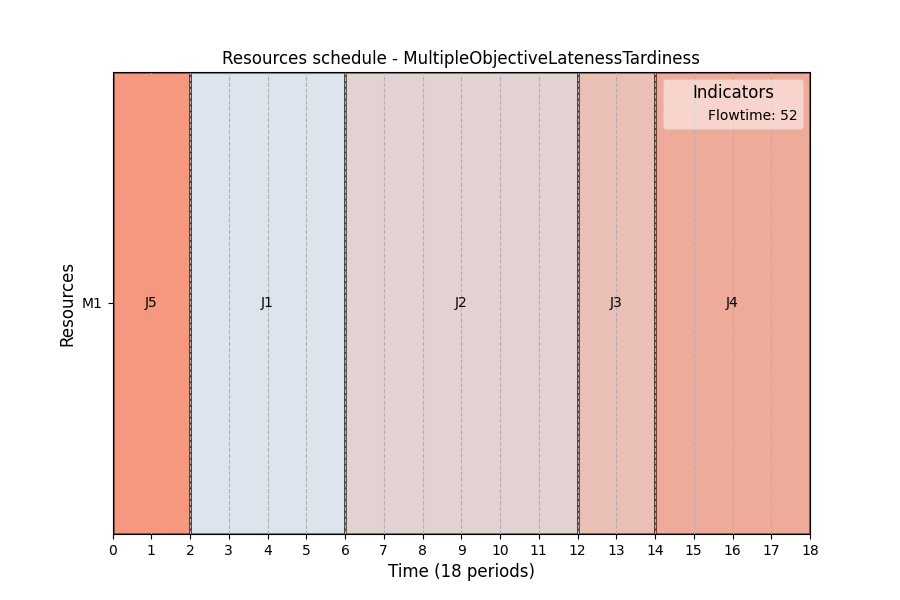

In [21]:
import processscheduler as ps

# Example 4.1.5 of the Pinedo book. The solution is expected to be:
# 1,3,6,5,4,2

problem = ps.SchedulingProblem(name="MultipleObjectiveLatenessTardiness")

J1 = ps.FixedDurationTask(name="J1", duration=4, due_date=10)
J2 = ps.FixedDurationTask(name="J2", duration=6, due_date=12, due_date_is_deadline=True)
J3 = ps.FixedDurationTask(name="J3", duration=2, due_date=14, due_date_is_deadline=True)
J4 = ps.FixedDurationTask(name="J4", duration=4, due_date=18, due_date_is_deadline=True)
J5 = ps.FixedDurationTask(name="J5", duration=2, due_date=18, due_date_is_deadline=True)

M1 = ps.Worker(name="M1")

for j in [J1, J2, J3, J4, J5]:
    j.add_required_resource(M1)

ps.ObjectiveMinimizeFlowtime()

solver = ps.SchedulingSolver(problem=problem)
solution_1 = solver.solve()
ps.render_gantt_matplotlib(solution_1)

The statement "Proceeding in this manner yields two optimal schedules, namely schedules 5, 1, 2, 3, 4 and 3, 1, 2, 5, 4." is confirmed.

## Example 6.1.1 (Flow Shops with Unlimited Intermediate Storage)

Consider 5 jobs on 4 machines with the processing times presented in the table below.

| jobs | $j_1$ | $j_2$ |$j_3$ |$j_4$ |$j_5$ |
| ---- | -- | -- | -- | -- | -- |
| $p_{1,j_k}$ | 5  | 5 | 3 | 6 | 3 |
| $p_{2,j_k}$ | 4  | 4 | 2 | 4 | 4 |
| $p_{3,j_k}$ | 4  | 4 | 3 | 4 | 1 |
| $p_{4,j_k}$ | 3  | 6 | 3 | 2 | 5 |

We solve this problem using the following Python script:

Solver type:
===========

-> Standard SAT/SMT solver

Incremental optimizer:
======================

Found value: 51 elapsed time:0.050s

Checking better value < 51

Found value: 50 elapsed time:0.063s

Checking better value < 50

Found value: 49 elapsed time:0.072s

Checking better value < 49

Found value: 48 elapsed time:0.087s

Checking better value < 48

Found value: 47 elapsed time:0.094s

Checking better value < 47

Found value: 46 elapsed time:0.097s

Checking better value < 46

Found value: 45 elapsed time:0.101s

Checking better value < 45

Found value: 44 elapsed time:0.114s

Checking better value < 44

Found value: 43 elapsed time:0.120s

Checking better value < 43

Found value: 42 elapsed time:0.124s

Checking better value < 42

Found value: 41 elapsed time:0.139s

Checking better value < 41

Found value: 40 elapsed time:0.142s

Checking better value < 40

Found value: 39 elapsed time:0.144s

Checking better value < 39

Found value: 38 elapsed time:0.150s

Checking better value < 38

Found value: 37 elapsed time:0.156s

Checking better value < 37

Found value: 36 elapsed time:0.173s

Checking better value < 36

Found value: 35 elapsed time:0.197s

Checking better value < 35

Found value: 34 elapsed time:0.206s

Checking better value < 34

Found value: 33 elapsed time:0.211s

Checking better value < 33

Found value: 32 elapsed time:0.215s

Checking better value < 32

Can't find a better solution for problem Pinedo6.1.1.

Found optimum 32. Stopping iteration.

total number of iterations: 21

value: 32

Pinedo6.1.1 satisfiability checked in 0.22s

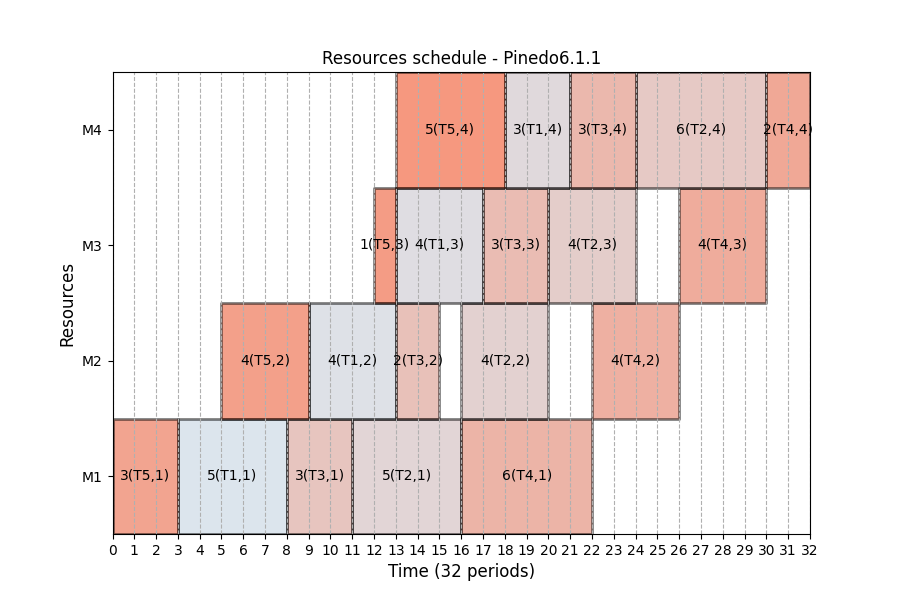

In [22]:
pb = ps.SchedulingProblem(name="Pinedo6.1.1")
durations = [[5, 4, 4, 3], [5, 4, 4, 6], [3, 2, 3, 3], [6, 4, 4, 2], [3, 4, 1, 5]]


# create machines
M1 = ps.Worker(name="M1")
M2 = ps.Worker(name="M2")
M3 = ps.Worker(name="M3")
M4 = ps.Worker(name="M4")

machines = [M1, M2, M3, M4]

# create tasks
job_number = 1
for job_number in range(5):
    j = 0
    tasks_for_this_job = []
    for d in durations[job_number]:
        t = ps.FixedDurationTask(name=f"{d}(T{job_number+1},{j+1})", duration=d)
        t.add_required_resource(machines[j])
        tasks_for_this_job.append(t)
        j += 1
    # and precedence
    for i in range(len(tasks_for_this_job) - 1):
        ps.TaskPrecedence(
            task_before=tasks_for_this_job[i], task_after=tasks_for_this_job[i + 1]
        )

ps.ObjectiveMinimizeMakespan()
solver = ps.SchedulingSolver(problem=pb)
solution = solver.solve()
ps.render_gantt_matplotlib(solution)

The resulting Gantt chart displays the optimal sequence, which is 5, 3, 1, 2, 4, with a makespan of 32:

![Pinedo611PSGanttSol](img/pinedo_6_1_1_gantt_solution.svg){ width="100%" }

This has to be be compared to the statement from Pinedo, p.161, where "the two sequences suggested by the heuristic are therefore 2, 5, 3, 1, 4 and 5, 2, 3, 1, 4. The makespan under both these sequences is 32. Complete enumeration veriﬁes that both sequences are optimal." We should verify that the Pinedo's sequence is actually a solution found by ProcessScheduler. This can be achived by adding a constraint to ensure that job 2 is prior to job 1.